<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico -> Grupo 2 SISTEMAS DE RECOMENDACION</h1>

- Bergamasco Julieta
- Fernandez María Soledad   
- Olariaga Sandra Mónica   
- Yvanoff Dario Javier   

# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [111]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
artist_data = pd.read_csv("D:\\Personales\\Estudios\\CienciadeDatos\\Diplo\\Materia Sistemas de Recomendacion\\hetrec2011-lastfm-2k\\artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [4]:
artist_data.shape

(17632, 4)

In [5]:
#artist_data = artist_data.rename(columns={'id': 'artistID'})
artist_data.rename(columns={'id': 'artistID'}, inplace=True)

In [7]:
user_artist_plays = pd.read_csv("D:\\Personales\\Estudios\\CienciadeDatos\\Diplo\\Materia Sistemas de Recomendacion\\hetrec2011-lastfm-2k\\user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [8]:
user_artist_plays.weight.min(), user_artist_plays.weight.max()

(1, 352698)

In [9]:
user_artist_plays.head(5)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [10]:
ad_uap = pd.merge(artist_data, user_artist_plays, on=["artistID"])

In [11]:
ad_uap.head()

,artistID,name,url,pictureURL,userID,weight
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,152


In [12]:
ad_uap.shape

(92834, 6)

## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando (quienes estén realizando la materia completa, en realidad pueden realizar ambas opciones si así lo desean).

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [13]:
tags = pd.read_csv("D:\\Personales\\Estudios\\CienciadeDatos\\Diplo\\Materia Sistemas de Recomendacion\\hetrec2011-lastfm-2k\\tags.dat", sep="\t", encoding='ISO-8859-1')
tags.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [14]:
n_artist = len(artist_data)
n_tags = tags['tagID'].nunique()
n_users = user_artist_plays['userID'].nunique()

In [15]:
print(f"Number of artist: {n_artist}")
print(f"Number of unique tagId's: {n_tags}")
print(f"Number of unique users: {n_users}")
print(f"Average number of artist per user: {round(n_artist/n_users, 2)}")
print(f"Average number of artist per tag: {round(n_artist/n_tags, 2)}")

Number of artist: 17632
Number of unique tagId's: 11946
Number of unique users: 1892
Average number of artist per user: 9.32
Average number of artist per tag: 1.48


#### 1.1 ¿Cuáles son los artistas que fueron más escuchados?

Agrupar por artista y sumar las cantidades de escucha por cada uno

In [16]:
art_agr = ad_uap.groupby(['artistID','name'])['weight'].sum().reset_index()
art_agr.head(10)

,artistID,name,weight
0,1,MALICE MIZER,771
1,2,Diary of Dreams,8012
2,3,Carpathian Forest,775
3,4,Moi dix Mois,563
4,5,Bella Morte,913
5,6,Moonspell,5080
6,7,Marilyn Manson,96201
7,8,DIR EN GREY,10791
8,9,Combichrist,9621
9,10,Grendel,4067


Seleccionar los **artistas mas escuchados**

In [17]:
art_me = art_agr.sort_values(by='weight', ascending=False).head(10)
art_me

,artistID,name,weight
283,289,Britney Spears,2393140
66,72,Depeche Mode,1301308
83,89,Lady Gaga,1291387
286,292,Christina Aguilera,1058405
492,498,Paramore,963449
61,67,Madonna,921198
282,288,Rihanna,905423
695,701,Shakira,688529
221,227,The Beatles,662116
294,300,Katy Perry,532545


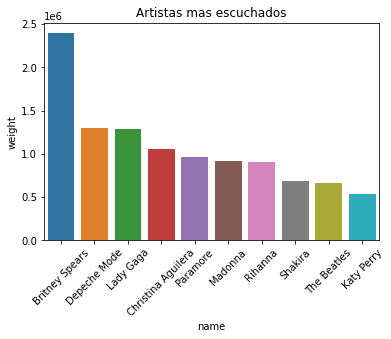

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
figsize =(15,20)
sns.barplot(data=art_me, x='name', y ='weight')
plt.xticks(rotation=45)
plt.title('Artistas mas escuchados')
plt.show()

#### 1.2  ¿Cómo es la distribución de cantidad de listens por user?

In [19]:
usr_agr = ad_uap.groupby(['userID'])['weight'].sum().reset_index()
usr_agr.head(10)

,userID,weight
0,2,168737
1,3,20501
2,4,26930
3,5,13159
4,6,1011
5,7,135399
6,8,36279
7,9,25597
8,10,28523
9,11,42920


In [20]:
usr_agr.shape

(1892, 2)

Text(0.5, 1.0, 'Histograma de distribución de Weight fot User')

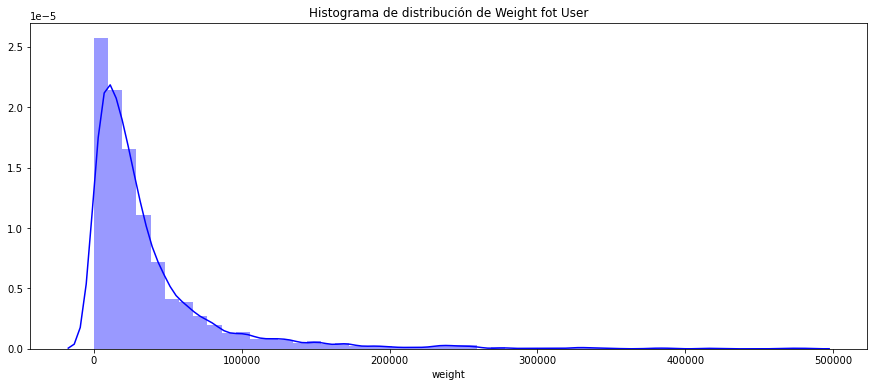

In [21]:
import seaborn
import matplotlib.pyplot as plt

plt.figure (figsize=(15,6))

seaborn.distplot(usr_agr.weight, color='blue', label='Weight of User', norm_hist=True)
plt.xlabel('weight')
plt.title('Histograma de distribución de Weight fot User')

Por lo que vemos la distribución del consumo o lo escuchado por usuario tiene una distribución normal asímetrica positiva. Una asimetría positiva implica que hay más valores distintos a la derecha de la media.

In [22]:
res = usr_agr[['weight']].agg(
    ['count', 'median', 'mean','std', 'max', 'min']
    )
res.loc['mode'] = usr_agr.weight.mode()[0]
res

,weight
count,1892.000000
median,21573.000000
mean,36566.582981
std,48744.552394
max,480039.000000
min,3.000000
mode,4.000000


#### 1.3 ¿Es posible ver el género más escuchado?

In [24]:
user_taggedartists = pd.read_csv("D:\\Personales\\Estudios\\CienciadeDatos\\Diplo\\Materia Sistemas de Recomendacion\\hetrec2011-lastfm-2k\\user_taggedartists.dat", sep="\t")
user_taggedartists.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [25]:
user_taggedartists.shape

(186479, 6)

In [26]:
tag_value = pd.merge(tags, user_taggedartists, on=["tagID"])

In [27]:
tag_value.shape

(186479, 7)

In [28]:
tag_agr = tag_value.groupby(['tagID','tagValue'])['userID'].count().reset_index()
tag_agr.head(10)


,tagID,tagValue,userID
0,1,metal,1729
1,2,alternative metal,212
2,3,goth rock,22
3,4,black metal,301
4,5,death metal,582
5,6,industrial metal,210
6,7,gothic metal,300
7,8,terror ebm,6
8,9,electro-industrial,55
9,10,harsh ebm,27


In [29]:
tag_agr.rename(columns={'userID': 'countTAG'}, inplace=True)

In [30]:
tag_me = tag_agr.sort_values(by='countTAG', ascending=False).head(10)
tag_me

,tagID,tagValue,countTAG
71,73,rock,7503
23,24,pop,5418
77,79,alternative,5251
17,18,electronic,4672
79,81,indie,4458
122,130,female vocalists,4228
24,25,80s,2791
38,39,dance,2739
76,78,alternative rock,2631
172,192,classic rock,2287


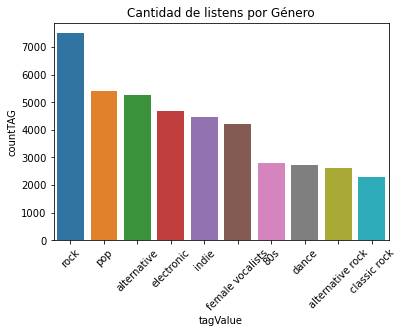

In [31]:
figsize =(15,20)
sns.barplot(data=tag_me, x='tagValue', y ='countTAG')
plt.xticks(rotation=45)
plt.title('Cantidad de listens por Género')
plt.show()

## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para quienes quieran aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa pueden optar por saltearse este ejercicio (aunque es recomendable pensarlo) y pasar directamente al [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

#### 2a.1 Desarrollo de la Matriz de Item-Contenido

In [32]:
artist_data.head(5)

,artistID,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [33]:
user_artist_plays.head(5)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [34]:
tags.head(5)

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [35]:
user_taggedartists.head(5)

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [36]:
artist_data.artistID.nunique()

17632

In [37]:
ar_us = pd.merge(artist_data, user_artist_plays, on=["artistID"])

In [38]:
ar_us.artistID.nunique()

17632

In [39]:
ar_us_tagar = pd.merge(ar_us, user_taggedartists, how='left',on=["artistID","userID"])

In [40]:
ar_us_tagar.artistID.nunique()

17632

In [41]:
ar_usr_tag = pd.merge(ar_us_tagar, tags, how='left', on=["tagID"] )

In [42]:
ar_usr_tag.artistID.nunique()

17632

In [43]:
ar_usr_tag.head(5)

,artistID,name,url,pictureURL,userID,weight,tagID,day,month,year,tagValue
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,212,NaN,NaN,NaN,NaN,NaN
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,483,1219.0,1.0,5.0,2008.0,jrock
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,76,2850.0,1.0,8.0,2010.0,better than lady gaga
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,1021,NaN,NaN,NaN,NaN,NaN
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,152,NaN,NaN,NaN,NaN,NaN


In [44]:
ar_usr_tag.weight.fillna(0,inplace=True)

In [45]:
reader = Reader(rating_scale=(ar_usr_tag.weight.min(), ar_usr_tag.weight.max()))

at_ratings = Dataset.load_from_df(ar_usr_tag[["userID", "name", "weight"]], reader)

In [46]:
at_ratings

#### 2a.2 Entrenamiento de Algoritmo de Recomendacion

In [47]:
at_ratings_train, at_ratings_test = train_test_split(at_ratings, test_size=0.2)

#### Algoritmo KNNWithMeans

In [48]:
model = KNNWithMeans(k=5).fit(at_ratings_train)
predictions = model.test(at_ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 4477.1243


In [49]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, at_ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4264.65943358.56644741.38993388.79544412.93154033.2685560.3017
MAE (testset)     677.8357654.5589697.3089648.9157685.4333672.810518.3785 
Fit time          1.08    1.10    1.13    1.12    1.11    1.11    0.02    
Test time         2.54    2.49    2.45    2.54    2.51    2.51    0.03    


#### Algoritmo SVD

In [50]:
model_svd = SVD(n_factors=100, n_epochs=20, random_state=42).fit(at_ratings_train)
predictions_svd = model_svd.test(at_ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions_svd, verbose=False)))

#UN valor de RMSE menor es mejor, es mejor el resultado comparado con el primer algoritmo

RMSE on test: 351352.9914


In [51]:
model_svd = SVD(n_factors=100, n_epochs=20, random_state=42, verbose=False)
cross_validated_metrics = cross_validate(model_svd, at_ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    351343.5430351343.3228351434.3468351351.5860351419.3415351378.428039.9266 
MAE (testset)     351249.6376351244.1759351361.3545351255.1819351344.9800351291.066051.0879 
Fit time          6.35    6.40    6.36    6.37    6.48    6.39    0.05    
Test time         0.29    0.17    0.17    0.28    0.18    0.22    0.06    


#### Algoritmos Varios

In [52]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    print('\n')
    results = cross_validate(algorithm, at_ratings, measures=['RMSE'], cv=5, verbose=True)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)



Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    351352.1839351397.9930351388.1016351421.9249351331.9385351378.428432.3060 
Fit time          6.35    6.38    6.42    6.38    6.36    6.38    0.02    
Test time         0.18    0.30    0.17    0.30    0.17    0.22    0.06    


Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    351382.6131351380.9430351373.7959351406.1373351348.6572351378.429318.4359 
Fit time          150.14  156.29  165.23  165.56  161.66  159.78  5.86    
Test time         3.57    2.91    4.00    2.71    4.16    3.47    0.57    


Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    8063.05408041.78687501.62207920.48478226.44047950.6776244.7599
Fit time          9.90    9.08    8.91    9.16    8.8

In [53]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [54]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBasic,3348.673056,1.121064,3.575517
KNNWithZScore,3618.702260,1.264678,4.192946
KNNBaseline,3686.426526,1.630721,5.043794
KNNWithMeans,3925.492614,1.131445,3.922542
CoClustering,6255.373872,4.436647,0.189185
BaselineOnly,6428.084687,0.428797,0.220008
NMF,7950.677583,9.169393,0.251193
NormalPredictor,9636.483924,0.215795,0.226588
SVD,351378.428380,6.378077,0.223542


#### 2a.3 Sistema de Recomendacion

In [55]:
#Generamos dataset para train y para test
at_ratings_train, at_ratings_test = train_test_split(at_ratings, test_size=0.2)

**KNNBaseline**

In [56]:
algo = KNNBaseline()
algo.fit(at_ratings_train)
predictions = algo.test(at_ratings_test)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [57]:
cross_validated_metrics = cross_validate(algo, at_ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3955.36263132.79483856.67382892.47063253.77743418.2158416.0974
MAE (testset)     583.6229555.7050616.0515574.2474566.3464579.194620.5881 
Fit time          1.49    1.48    1.50    1.50    1.56    1.51    0.03    
Test time         4.08    4.36    4.29    4.21    4.37    4.26    0.11    


In [58]:
test = pd.DataFrame(predictions)
test = test.rename(columns={'uid':'userID', 'iid': 'artistID', 
                            'r_ui':'actual', 'est':'prediction'})

In [59]:
# avg ratings and rating counts
avg_rating = test.groupby("artistID")["prediction"].mean()
num_ratings = test.groupby("artistID")["prediction"].count()
# getting counts and average ratings
ratings_counts = pd.DataFrame({"avg_rating": avg_rating,
                               "num_of_ratings": num_ratings})
# joining the new values to movie data
full_artist_data = pd.merge(test, ratings_counts, left_on="artistID", right_index=True)

In [82]:
full_artist_data.head(5)

,userID,artistID,actual,prediction,details,avg_rating,num_of_ratings
0,877,Exumer,314.0,334.798000,"{'actual_k': 2, 'was_impossible': False}",334.798000,1
1,1660,Oingo Boingo,143.0,433.049641,"{'actual_k': 3, 'was_impossible': False}",413.916524,12
1476,1327,Oingo Boingo,15.0,8.663764,"{'actual_k': 38, 'was_impossible': False}",413.916524,12
3927,91,Oingo Boingo,602.0,1473.542109,"{'actual_k': 8, 'was_impossible': False}",413.916524,12
9545,66,Oingo Boingo,476.0,476.000144,"{'actual_k': 38, 'was_impossible': False}",413.916524,12


In [60]:
artist_pivot = test.pivot_table(index='userID', 
                            columns='artistID', values='prediction').fillna(0)

In [109]:
def get_similar_artist(full_artist_data: pd.DataFrame,
                       artist_matrix: pd.DataFrame,
                       artist_title: str,
                       min_num_of_ratings: int = 100,
                       n_recommendations: int = 10
                       ):
    """
    Get similar movies based on correlation with other movies 
    """
    if len(full_artist_data[full_artist_data['artistID'].str.contains(artist_title)])>0:
        # get most correlated movies
        similar_artist = artist_matrix.corrwith(artist_matrix[artist_title])
        # converting to a dataframe and dropping NaN's
        similar_corr_df = pd.DataFrame({"correlation":similar_artist})
        similar_corr_df.dropna(inplace=True)

        # store the oringinal dataframe
        orig = full_artist_data.copy()

        # merge with correlated dataframe but only keep specified columns
        corr_with_artist = pd.merge(left=similar_corr_df,
                                   right=orig, 
                                   on="artistID")[
            ["artistID", "correlation", "avg_rating", "num_of_ratings"]].drop_duplicates().reset_index(drop=True)

        # filter movies with less than min_num_of_ratings
        result = corr_with_artist[corr_with_artist['num_of_ratings'] > min_num_of_ratings].sort_values(
                                                                                         by='correlation',
                                                                                         ascending=False)
        return result.iloc[1:, :].head(n_recommendations)
    else:
        return art_me.iloc[1:,:].head(n_recomendations)

In [64]:
# test function on Toy Story
get_similar_artist(full_artist_data, artist_pivot, "Britney Spears", 90, 10)

,artistID,correlation,avg_rating,num_of_ratings
3593,Lady Gaga,0.183885,2380.878150,220
3984,Mariah Carey,0.136835,3656.648024,93
3550,Kylie Minogue,0.134354,2510.944602,97
4698,P!nk,0.096384,1534.185232,94
590,Avril Lavigne,0.084755,1221.544650,137
1306,Christina Aguilera,0.076708,4532.091874,185
5172,Rihanna,0.075276,4146.465871,166
3413,Ke$ha,0.073446,1530.474224,115
760,Beyoncé,0.059545,1128.175270,119
3903,Madonna,0.054115,4364.247339,199


#### Si bien al comparar todos los modelos este es el que mejor resultado da, al correrlo individualmente con otros parámetros el KNNBasic a priori pareciera es que unos puntos mejor

### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

#### 2b.1 Evaluacion sobre cold start

**Artistas que vamos a dejar fuera**
**	artistID	name	weight**
- 	289	Britney Spears	2393140
- 	72	Depeche Mode	1301308
- 	89	Lady Gaga	1291387
- 	292	Christina Aguilera	1058405
- 	498	Paramore	963449
- 	67	Madonna	921198
- 	288	Rihanna	905423
- 	701	Shakira	688529
- 	227	The Beatles	662116
- 	300	Katy Perry	532545 

In [65]:
options = [289, 72, 89, 292, 498, 67, 288, 701, 227, 300] 

artist_data_sin_cs = artist_data[~artist_data.artistID.isin(options)]

In [66]:
### Verificar que no estan algun artista en el dataframe    
artist_data_sin_cs[artist_data_sin_cs['artistID']==89]

,artistID,name,url,pictureURL


In [67]:
user_artist_plays_sin_cs = user_artist_plays[~user_artist_plays.artistID.isin(options)]

In [68]:
user_artist_plays_sin_cs

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [69]:
user_taggedartists_sin_cs = user_taggedartists[~user_taggedartists.artistID.isin(options)]

In [70]:
user_taggedartists_sin_cs

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
...,...,...,...,...,...,...
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010
186477,2100,16437,2801,1,5,2010


In [71]:
tags

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
...,...,...
11941,12644,suomi
11942,12645,symbiosis
11943,12646,sverige
11944,12647,eire


In [72]:
user_artist_tag = pd.merge(tags, user_taggedartists_sin_cs, on=["tagID"])

In [73]:
user_artist_tag

,tagID,tagValue,userID,artistID,day,month,year
0,1,metal,4,918,1,5,2008
1,1,metal,12,181,1,5,2010
2,1,metal,12,198,1,2,2010
3,1,metal,12,500,1,2,2010
4,1,metal,12,503,1,3,2010
...,...,...,...,...,...,...,...
180222,12647,eire,2096,166,1,8,2010
180223,12647,eire,2096,389,1,9,2010
180224,12647,eire,2096,511,1,8,2010
180225,12647,eire,2096,1375,1,8,2010


In [74]:
user_artist_tag.artistID.nunique()

12513

In [75]:
user_artist_tag = pd.merge(user_artist_tag, artist_data, how='inner', on=["artistID"])

In [76]:
user_artist_tag.dtypes

tagID          int64
tagValue      object
userID         int64
artistID       int64
day            int64
month          int64
year           int64
name          object
url           object
pictureURL    object
dtype: object

In [77]:
user_artist_tag.artistID.nunique()

12123

In [78]:
user_artist_tag

,tagID,tagValue,userID,artistID,day,month,year,name,url,pictureURL
0,1,metal,4,918,1,5,2008,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
1,1,metal,170,918,1,11,2008,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
2,1,metal,313,918,1,5,2007,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
3,1,metal,491,918,1,2,2009,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
4,1,metal,595,918,1,8,2005,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
...,...,...,...,...,...,...,...,...,...,...
178684,12641,derd,2095,18669,1,11,2008,Kızılırmak,http://www.last.fm/music/K%C4%B1z%C4%B1l%C4%B1...,http://userserve-ak.last.fm/serve/252/40266747...
178685,12640,devrim,2095,18678,1,12,2008,ibrahim paşalı,http://www.last.fm/music/ibrahim+pa%C5%9Fal%C4%B1,http://userserve-ak.last.fm/serve/252/18799329...
178686,12640,devrim,2095,18689,1,11,2008,Yalçın Gül,http://www.last.fm/music/Yal%C3%A7%C4%B1n+G%C3...,http://userserve-ak.last.fm/serve/252/17023337...
178687,12640,devrim,2095,18695,1,12,2008,Carlos Puebla,http://www.last.fm/music/Carlos+Puebla,http://userserve-ak.last.fm/serve/252/521276.jpg


In [79]:
user_artist_plays_sin_cs.dtypes

userID      int64
artistID    int64
weight      int64
dtype: object

In [80]:
user_artist_tag = pd.merge(user_artist_plays_sin_cs, user_artist_tag, on=["artistID","userID"]) 

In [81]:
user_artist_tag.artistID.nunique()

6844

#### 2b.2 Generar los Vectores de Contenido

In [83]:
user_artist_tag.head()

,userID,artistID,weight,tagID,tagValue,day,month,year,name,url,pictureURL
0,2,52,11690,13,chillout,1,4,2009,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
1,2,52,11690,15,downtempo,1,4,2009,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
2,2,52,11690,18,electronic,1,4,2009,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
3,2,52,11690,21,trip-hop,1,4,2009,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
4,2,52,11690,41,female vovalists,1,4,2009,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...


In [84]:
usr_art = user_artist_tag.groupby(['userID','name'])['weight'].sum().reset_index()
usr_art.head(10)

,userID,name,weight
0,2,Café Del Mar,20672
1,2,Enigma,14940
2,2,Fleetwood Mac,2684
3,2,Ministry of Sound,10984
4,2,Morcheeba,58450
5,3,Big Brotherz,308
6,3,Magnitophono,1416
7,3,Manekinekod,324
8,3,Philippe Lamy,340
9,3,Pleq,303048


In [85]:
artist_tag = user_artist_tag.groupby(['artistID','tagValue'])['weight'].sum().reset_index()
artist_tag.head(5)

,artistID,tagValue,weight
0,1,better than lady gaga,76
1,1,jrock,483
2,2,darkwave,4895
3,2,german,3627
4,2,gothic,4055


In [86]:
artists = user_artist_tag.groupby(['artistID','name'])['weight'].sum().reset_index()
artists.head(10)

,artistID,name,weight
0,1,MALICE MIZER,559
1,2,Diary of Dreams,12738
2,3,Carpathian Forest,185
3,4,Moi dix Mois,1124
4,5,Bella Morte,780
5,6,Moonspell,1989
6,7,Marilyn Manson,49147
7,8,DIR EN GREY,14784
8,9,Combichrist,2990
9,10,Grendel,5918


In [87]:
artists.shape

(6844, 3)

In [88]:
import numpy as np
artists["artistLIST"] = np.nan
artists.head(10)

,artistID,name,weight,artistLIST
0,1,MALICE MIZER,559,NaN
1,2,Diary of Dreams,12738,NaN
2,3,Carpathian Forest,185,NaN
3,4,Moi dix Mois,1124,NaN
4,5,Bella Morte,780,NaN
5,6,Moonspell,1989,NaN
6,7,Marilyn Manson,49147,NaN
7,8,DIR EN GREY,14784,NaN
8,9,Combichrist,2990,NaN
9,10,Grendel,5918,NaN


In [89]:
for i in artists.index:
    tags = artist_tag[artist_tag["artistID"] == artists["artistID"][i]]["tagValue"]
    tagLIST = tags.values.tolist()
    artists["artistLIST"][i] = tagLIST
   

C:\ProgramData\Miniconda3\envs\rec-sys\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Miniconda3\envs\rec-sys\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
artists.head(5)

,artistID,name,weight,artistLIST
0,1,MALICE MIZER,559,"[better than lady gaga, jrock]"
1,2,Diary of Dreams,12738,"[darkwave, german, gothic, gothic rock]"
2,3,Carpathian Forest,185,"[black metal, norsk arysk metal, norwegian bla..."
3,4,Moi dix Mois,1124,"[j-rock, visual kei]"
4,5,Bella Morte,780,"[darkwave, gothic, gothic rock]"


In [91]:
artists.drop(columns=['weight'])

,artistID,name,artistLIST
0,1,MALICE MIZER,"[better than lady gaga, jrock]"
1,2,Diary of Dreams,"[darkwave, german, gothic, gothic rock]"
2,3,Carpathian Forest,"[black metal, norsk arysk metal, norwegian bla..."
3,4,Moi dix Mois,"[j-rock, visual kei]"
4,5,Bella Morte,"[darkwave, gothic, gothic rock]"
...,...,...,...
6839,18734,The Young Gods,"[alternative, electronica]"
6840,18735,Wiseblood,[alternative]
6841,18736,LOSTFREEQ,"[-pearl fashion music, ambient, aphex twin, at..."
6842,18737,Ciccone Youth,"[alternative, electronica, trip beat]"


#### 2b.3 Sistema de Recomendacion

In [92]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class GenresBasedFilter(object):
    def __init__(self, artists, k=5):
        self.artist_to_idx = {row["name"]: idx for idx, row in artists.iterrows()}
        self.idx_to_artist = {idx: artist for artist, idx in self.artist_to_idx.items()}
        self.k = k

        tagres = set(g for G in artists['artistLIST'] for g in G)
        for g in tagres:
            artists[g] = artists.artistLIST.transform(lambda x: int(g in x))

        self.artist_tagres = artists.drop(columns=['artistID', 'name', 'artistLIST'])

    def fit(self, usr_ratings):
        self.artist_cosine_sim_ = cosine_similarity(self.artist_tagres, self.artist_tagres)

        self.user_ratings_ = {}
        for (userID, name, weight_rank) in usr_ratings.build_testset():
            if userID not in self.user_ratings_:
                self.user_ratings_[userID] = {}
            self.user_ratings_[userID][name] = weight_rank

        return self

    def predict(self, userID, artist):
        if not userID in self.user_ratings_ or not artist in self.artist_to_idx:
            global_mean = np.mean([
                usr_ratings for artist in self.user_ratings_.values() for usr_ratings in artist.values()
            ])
            return global_mean

        artist_idx = self.artist_to_idx[artist]
        sim_scores = list(enumerate(self.artist_cosine_sim_[artist_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:]

        sims = []

        for artist, score in sim_scores:
            if self.idx_to_artist[artist] in self.user_ratings_[userID]:
                sims.append((self.user_ratings_[userID][self.idx_to_artist[artist]], score))
                if len(sims) >= self.k:
                    break

        user_mean = np.mean(list(self.user_ratings_[userID].values()))

        pred = 0
        sim_sum = 0

        for rating, score in sims:
            pred += score * (rating - user_mean)
            sim_sum += score

        if sim_sum == 0:
            return user_mean

        return user_mean + pred / sim_sum

In [93]:
cb_model = GenresBasedFilter(artists).fit(at_ratings_train)

In [94]:
from tqdm import tqdm_notebook

transformed_ratings_train = []

for u, m, r in tqdm_notebook(at_ratings_train.build_testset()):
    transformed_ratings_train.append({
        "userID": u,
        "name": m,
        "cb_rating": cb_model.predict(u, m),
        "cf_rating": algo.predict(u, m).est,
        "weight": r
    })

transformed_ratings_train = pd.DataFrame(transformed_ratings_train)

C:\ProgramData\Miniconda3\envs\rec-sys\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [95]:
transformed_ratings_train.head(5)

,userID,name,cb_rating,cf_rating,weight
0,971,Coldplay,158.400000,767.157860,767.0
1,971,Cazuza,87.600009,84.771762,54.0
2,971,The Killers,300.800000,102.331702,104.0
3,971,Slipknot,175.400000,198.551220,205.0
4,971,Paramore,772.086135,116.311942,120.0


In [96]:
transformed_ratings_train.shape

(116421, 5)

In [97]:
#Funciones Atributos

from collections import defaultdict

user_mean_rating = defaultdict(
    lambda: transformed_ratings_train["weight"].sum(),
    transformed_ratings_train.groupby("userID")["weight"].sum().to_dict()
)
user_num_rating = defaultdict(
    lambda: 0,
    transformed_ratings_train.groupby("userID").size().to_dict()
)

def feature_function_constant():
    return 1

def feature_function_mean(user_id): # Media de rating que devuelve el usuario
    return user_mean_rating[user_id]

def feature_function_over(user_id, min_ratings=3): # Si el usuario puntuo más de 3 ratings
    return int(user_num_rating[user_id] >= min_ratings)

In [98]:
for base_model in ["cb", "cf"]:
    transformed_ratings_train["{}_rating_fc".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_constant(),
            axis=1
        )
    transformed_ratings_train["{}_rating_fm".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_mean(row["userID"]),
            axis=1
        )
    transformed_ratings_train["{}_rating_fo".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_over(row["userID"]),
            axis=1
        )

In [99]:
from sklearn.linear_model import LinearRegression

fwls_model = LinearRegression()

feature_cols = ["{}_rating_{}".format(fm, ff) for fm in ["cb", "cf"] for ff in ["fc", "fo", "fm"]]

fwls_model.fit(
    transformed_ratings_train[feature_cols],
    transformed_ratings_train["weight"]
)

LinearRegression()

#### 2b.4 Evaluacion del Modelo

In [100]:
# Tenemos que hacer todos los pasos de neuvo
transformed_ratings_test = []

for u, m, r in tqdm_notebook(at_ratings_test):
    transformed_ratings_test.append({
        "userID": u,
        "name": m,
        "cb_rating": cb_model.predict(u, m),
        "cf_rating": algo.predict(u, m).est,
        "weight": r
    })

transformed_ratings_test = pd.DataFrame(transformed_ratings_test)

C:\ProgramData\Miniconda3\envs\rec-sys\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [101]:
# Calcular el meta atributo de la meta funcion
for base_model in ["cb", "cf"]:
    transformed_ratings_test["{}_rating_fc".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_constant(),
            axis=1
        )
    transformed_ratings_test["{}_rating_fm".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_mean(row["userID"]),
            axis=1
        )
    transformed_ratings_test["{}_rating_fo".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_over(row["userID"]),
            axis=1
        )

transformed_ratings_test["fwls_rating"] = fwls_model.predict(transformed_ratings_test[feature_cols])

#obtiene meta atributos multiplicados por metafunciones

In [102]:
transformed_ratings_test.head(5)

,userID,name,cb_rating,cf_rating,weight,cb_rating_fc,cb_rating_fm,cb_rating_fo,cf_rating_fc,cf_rating_fm,cf_rating_fo,fwls_rating
0,877,Exumer,342.800003,313.998526,314.0,342.800003,5.087152e+06,342.800003,313.998526,4.659738e+06,313.998526,311.140598
1,1660,Oingo Boingo,184.200000,143.576814,143.0,184.200000,1.245008e+06,184.200000,143.576814,9.704357e+05,143.576814,151.505423
2,1752,Sneaker Pimps,991.000000,1002.998438,1003.0,991.000000,5.620556e+07,991.000000,1002.998438,5.688606e+07,1002.998438,956.615161
3,1872,Fall Out Boy,3438.600000,8397.997151,8398.0,3438.600000,2.324700e+08,3438.600000,8397.997151,5.677550e+08,8397.997151,7943.671266
4,1727,Interpol,569.800000,414.008786,414.0,569.800000,1.274130e+07,569.800000,414.008786,9.257650e+06,414.008786,403.086747


In [103]:
from sklearn.metrics import mean_squared_error

for model in ["cf", "cb", "fwls"]:
    rmse = np.sqrt(
        mean_squared_error(
            transformed_ratings_test["weight"],
            transformed_ratings_test["{}_rating".format(model)]
        )
    )
    
    print("RMSE for {} model: {:03f}".format(model, rmse))

RMSE for cf model: 1686.230072
RMSE for cb model: 8334.256261
RMSE for fwls model: 1632.033773


#### El cf model es el que devuelve mejores resultados. Sin embargo vamos a utilizar fwls_rating para indicar artistas similares

In [104]:
# avg ratings and rating counts
avg_rating = transformed_ratings_test.groupby("name")["fwls_rating"].mean()
num_ratings = transformed_ratings_test.groupby("name")["fwls_rating"].count()
# getting counts and average ratings
fwls_ratings_counts = pd.DataFrame({"avg_rating": avg_rating,
                               "num_of_ratings": num_ratings})
# joining the new values to movie data
full_artist_data_fwls = pd.merge(transformed_ratings_test, fwls_ratings_counts, left_on="name", right_index=True)

In [105]:
full_artist_data_fwls = full_artist_data_fwls.rename(columns = {'name': 'artistID'}, inplace = False)

In [106]:
transformed_ratings_test = transformed_ratings_test.rename(columns = {'name': 'artistID'}, inplace = False)

In [107]:
artist_pivot_fwls = transformed_ratings_test.pivot_table(index='userID', 
                            columns='artistID', values='fwls_rating').fillna(0)

In [110]:
# test function on Toy Story
get_similar_artist(full_artist_data_fwls, artist_pivot_fwls, "Madonna", 90, 10)

,artistID,correlation,avg_rating,num_of_ratings
3550,Kylie Minogue,0.351492,2166.301019,97
1012,Britney Spears,0.198727,7069.935753,249
4698,P!nk,0.123223,1049.919316,94
4193,Miley Cyrus,0.068955,3912.382000,98
1306,Christina Aguilera,0.065665,4231.397176,185
6054,The Beatles,0.041661,2738.689569,150
760,Beyoncé,0.039388,1101.714509,119
4158,Michael Jackson,0.033012,3001.693197,117
3984,Mariah Carey,0.025517,2725.445848,93
590,Avril Lavigne,0.023391,1118.253740,137
